# Activity: Full OSEMN

## Introduction

In this assignment, you will work on a data analysis project. This project will
let you practice the skills you have learned in this course and write real code
in Python.

You will perform the following steps of the OSEMN framework:  
- [Scrub](#scrub)
- [Explore](#explore)
- [Interpret](#interpret)

In [1]:
# We'll import the libraries you'll likely use for this activity
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
df = pd.read_csv('transactions-pet_store.csv')
df_orig = df.copy()

## Scrub

You will scrub the data. It's important that you follow the directions as
stated. Doing more or less than what is asked might lead to not getting full
points for the question.

------

If while you're working on the scrubbing phase you need to reset the DataFrame,
you can restart the kernel (in the toolbar: "Kernel" > "Restart").

#### Question 1

Remove all rows that have are missing either the `Product_Name` or the
`Product_Category`. Assign the cleaned DataFrame to the variable `df`
(overwriting the original DataFrame.).

In [2]:
df = df.dropna(subset=['Product_Name', 'Product_Category'])
df

,Date,Order_Number,Customer_ID,Product_Name,SKU,Price,Size,Quantity,Product_Category,Product_Line
0,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Feline Fix Mix,RKAPY3I1TP,39.55,NaN,1,treat,cat
1,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Scratchy Post,MPH6SCD7UT,26.95,NaN,3,toy,cat
2,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Reddy Beddy,DJWE1V9LZK,23.07,large,3,bedding,dog
3,3/23/2020,DG7-5410-5845-1340,5929a0e9-95a7-4dbf-896e-c11d1988615e,Snoozer Essentails,GABWVMEL2R,28.04,NaN,3,bedding,dog
4,3/23/2020,DG7-5410-5845-1340,5929a0e9-95a7-4dbf-896e-c11d1988615e,Reddy Beddy,KDTMPSBZKZ,13.84,small,1,bedding,dog
...,...,...,...,...,...,...,...,...,...,...
2898,10/16/2020,P8K-8079-0264-6569,468f40b3-59ca-47fd-9739-c7f19cf48f32,Cat Cave,058G0P7V60,29.66,NaN,1,bedding,cat
2899,10/16/2020,P8K-8079-0264-6569,468f40b3-59ca-47fd-9739-c7f19cf48f32,Kitty Climber,W86BRJ9SSG,39.32,NaN,1,toy,cat
2900,10/16/2020,P8K-8079-0264-6569,468f40b3-59ca-47fd-9739-c7f19cf48f32,Fetch Blaster,M291KHJ4LW,29.47,NaN,1,toy,dog
2901,10/16/2020,P8K-8079-0264-6569,468f40b3-59ca-47fd-9739-c7f19cf48f32,Snoozer Essentails,GABWVMEL2R,28.04,NaN,1,bedding,dog


In [3]:
# Question 1 Grading Checks

assert df.shape[0] <= 2874, 'Did you remove all the rows with missing values for the columns Product_Name & Product_Category?'
assert df.shape[0] >= 2700, 'Did you remove too many the rows with missing values?'
assert len(df.columns) == 10, 'Make sure you do not drop any columns.'

#### Question 2

Find any clearly "incorrect" values in the `Price` column and "clean" the
DataFrame to address those values.

Ensure you make the changes to the DataFrame assigned to the variable `df`.

In [4]:
print(df['Price'].describe())
print(df[df['Price'] <= 0])
df = df[df['Price'] > 0]

count     2758.000000
mean        25.621632
std        535.327290
min     -19873.000000
25%         17.160000
50%         25.480000
75%         34.380000
max      19873.000000
Name: Price, dtype: float64
         Date       Order_Number                           Customer_ID  \
67  5/24/2020  KAI-53R-H05P-1T41  8e67ab1c-5a30-9999-ad7d-51819e7e44ee   

       Product_Name         SKU    Price Size  Quantity Product_Category  \
67  MissingNo Plush  PHA6NTT7OM -19873.0  NaN         1              toy   

   Product_Line  
67          dog  


In [5]:
upper_limit = df['Price'].quantile(0.999)
df = df[df['Price'] <= upper_limit]

In [6]:
# Question 2 Grading Checks

assert (df.Price < df.Price.quantile(0.0001)).sum() == 0, 'Check for very small values'
assert (df.Price > df.Price.quantile(0.999)).sum() == 0, 'Check for very large values'

#### Question 3

After you've done the cleaning above, remove any column that has more than `500`
missing values.

Ensure you make the changes to the DataFrame assigned to the variable `df`.

In [7]:
# Your code here

df = df.dropna(axis=1, thresh=len(df) - 500)

In [8]:
# Question 3 Grading Checks

assert len(df.columns) < 10, 'You should have dropped 1 or more columns (with more than 500 missing values)'

#### Question 4

Address the other missing values. You can replace the values or remvove them,
but whatever method you decide to clean the DataFrame, you should no longer have
any missing values.

Ensure you make the changes to the DataFrame assigned to the variable `df`.

In [9]:
df = df.dropna()

In [10]:
# Question 4 Grading Checks

assert df.Customer_ID.isna().sum() == 0, 'Did you address all the missing values?'

## Explore

You will explore the data. It's important that you follow the directions as
stated. Doing more or less than what is asked might lead to not getting full
points for the question.

You may use either exploratory statistics or exploratory visualizations to help
answer these questions.

------

Note that the DataFrame loaded for this section (in the below cell) is different
from the data you used in the [Scrub](#scrub) section.

If while you're working on the scrubbing phase you need to reset the DataFrame,
you can restart the kernel (in the toolbar: "Kernel" > "Restart").

In [11]:
df = pd.read_csv('transactions-pet_store-clean.csv')

#### Question 5

Create a `Subtotal` column by multiplying the `Price` and `Quantity` values. 
This represents how much was spent for a given transaction (row).

In [12]:
df['Subtotal'] = df['Price'] * df['Quantity']
df

,Date,Order_Number,Customer_ID,Product_Name,SKU,Price,Quantity,Product_Category,Product_Line,Subtotal
0,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Feline Fix Mix,RKAPY3I1TP,39.55,1,treat,cat,39.55
1,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Scratchy Post,MPH6SCD7UT,26.95,3,toy,cat,80.85
2,5/22/2021,SXF-7309-1727-1334,476582ea-1bba-4289-8775-3fcd8074821c,Reddy Beddy,DJWE1V9LZK,23.07,3,bedding,dog,69.21
3,3/23/2020,DG7-5410-5845-1340,5929a0e9-95a7-4dbf-896e-c11d1988615e,Snoozer Essentails,GABWVMEL2R,28.04,3,bedding,dog,84.12
4,3/23/2020,DG7-5410-5845-1340,5929a0e9-95a7-4dbf-896e-c11d1988615e,Reddy Beddy,KDTMPSBZKZ,13.84,1,bedding,dog,13.84
...,...,...,...,...,...,...,...,...,...,...
2709,10/16/2020,P8K-8079-0264-6569,468f40b3-59ca-47fd-9739-c7f19cf48f32,Cat Cave,058G0P7V60,29.66,1,bedding,cat,29.66
2710,10/16/2020,P8K-8079-0264-6569,468f40b3-59ca-47fd-9739-c7f19cf48f32,Kitty Climber,W86BRJ9SSG,39.32,1,toy,cat,39.32
2711,10/16/2020,P8K-8079-0264-6569,468f40b3-59ca-47fd-9739-c7f19cf48f32,Fetch Blaster,M291KHJ4LW,29.47,1,toy,dog,29.47
2712,10/16/2020,P8K-8079-0264-6569,468f40b3-59ca-47fd-9739-c7f19cf48f32,Snoozer Essentails,GABWVMEL2R,28.04,1,bedding,dog,28.04


In [13]:
# Question 5 Grading Checks

assert 'Subtotal' in df.columns, ''

#### Question 6

Determine most common category (`Product_Category`) purchases (number of total
items) for both `Product_Line` categories. Assign the (string) name of these
categories to their respective variables `common_category_cat` & 
`common_category_dog`.

In [14]:
category_totals = df.groupby(['Product_Line', 'Product_Category'])['Quantity'].sum()
common_category_cat = category_totals['cat'].idxmax()
common_category_dog = category_totals['dog'].idxmax()
print("Most common category for cat: " + common_category_cat)
print("Most common category for dog: " + common_category_dog)

Most common category for cat: treat
Most common category for dog: bedding


In [15]:
# Question 6 Grading Checks

assert isinstance(common_category_dog, str), 'Ensure you assign the name of the category (string) to the variable common_category_dog'
assert isinstance(common_category_cat, str), 'Ensure you assign the name of the category (string) to the variable common_category_cat'

#### Question 7

Determine which categories (`Product_Category`), by `Product_Line` have the
***median*** highest `Price`.
Assign the (string) name of these categories to their respective variables
`priciest_category_cat` & `priciest_category_dog`.

In [16]:
# Median highest Price: highest of the median prices per category
median_prices = df.groupby(['Product_Line', 'Product_Category'])['Price'].median()
median_prices

Product_Line  Product_Category
cat           bedding             29.66
              food                24.53
              toy                 16.71
              treat               19.96
dog           bedding             28.04
              food                18.53
              toy                 29.47
              treat               25.48
Name: Price, dtype: float64

In [17]:
priciest_category_cat = median_prices['cat'].idxmax()
priciest_category_dog = median_prices['dog'].idxmax()

print("Priciest category for cat: " + priciest_category_cat)
print("Priciest category for dog: " + priciest_category_dog)

Priciest category for cat: bedding
Priciest category for dog: toy


In [18]:
# Question 7 Grading Checks

assert isinstance(priciest_category_dog, str), 'Ensure you assign the name of the category (string) to the variable priciest_category_dog'
assert isinstance(priciest_category_cat, str), 'Ensure you assign the name of the category (string) to the variable priciest_category_cat'

## Modeling

This is the point of the framework where we'd work on modeling with our data.
However, in this activity, we're going to move straight to interpretting.

## Interpret

You will interpret the data based on what you found so far. It's important that
you follow the directions as stated. Doing more or less than what is asked might
lead to not getting full points for the question.


------

Note that the DataFrame loaded for this section (in the below cell) is the same
as the data you used in the [Explore](#explore) section.

If while you're working on the scrubbing phase you need to reset the DataFrame,
you can restart the kernel (in the toolbar: "Kernel" > "Restart").

#### Question 8

You want to emphasize to your stakeholders that the total number of product
categories sold differ between the two `Product_Line` categories (`'cat'` & 
`'dog'`).

Create a **_horizontal_ bar plot** that has `Product_Category` on the y-axis and
the total number of that category sold (using the `Quantity`) by each 
`Product_Line` category. Also **change the axis labels** to something meaningful
and add a title.

You will likely want to use Seaborn. Make sure you set the result to the
variable `ax` like the following:
```python
ax = # code to create a bar plot
```

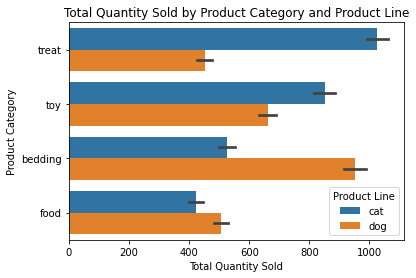

In [19]:
# Your code here

# Plotting total quantity sold by Product_Category for each Product_Line
ax = sns.barplot(data=df, x='Quantity', y='Product_Category', hue='Product_Line', estimator=sum)
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Category')
plt.title('Total Quantity Sold by Product Category and Product Line')
plt.legend(title='Product Line')
plt.show()

In [20]:
# Question 8 Grading Checks

assert isinstance(ax, plt.Axes), 'Did you assign the plot result to the variable ax?'

#### Question 9

Based on the plot from [Question 8](#question-8), what would you conclude for
your stakeholders about what products they should sell? What would be the
considerations and/or caveats you'd communicate to your stakeholders?

Write at least a couple sentences of your thoughts in a string assigned to the
variable `answer_to_9`.

The cell below should look something like this:
```python
answer_to_9 = '''
I think that based on the visualization that ****.
Therefore I would communicate with the stakeholders that ****
'''
```

In [21]:
# Your code here
answer_to_9 = '''
Based on the visualization, cat treats and dog bedding are the top-selling products, as can be seen that these categories dominate sales volume. Therefore, I would communicate with the stakeholders that we should prioritize and expand our offerings of cat treats and dog bedding. However since this chart reflects only sales quantity, we need to analyze profit margins to identify which products are actually the most financially valuable.
'''
print(len(answer_to_9))
print(answer_to_9)

441

Based on the visualization, cat treats and dog bedding are the top-selling products, as can be seen that these categories dominate sales volume. Therefore, I would communicate with the stakeholders that we should prioritize and expand our offerings of cat treats and dog bedding. However since this chart reflects only sales quantity, we need to analyze profit margins to identify which products are actually the most financially valuable.



In [22]:
# Question 9 Grading Checks

assert isinstance(answer_to_9, str), 'Make sure you create a string for your answer.'

#### Question 10

The plot you created for [Question 8](#question-8) is good but could be modified
to emphasize which products are important for the business.

Create an explanatory visualization that emphasizes the insight you about the
product category. This would be a visualization you'd share with the business
stakeholders.

Make sure you set the result to the variable `ax` like the following:
```python
ax = # code to create explanatory visualization
```

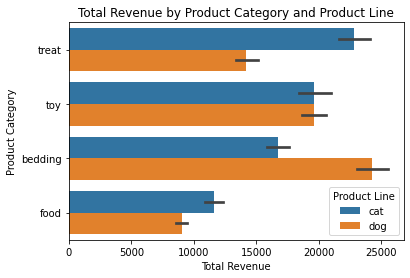

For both cat and dog product lines, the category that sells the most units is also the one that generates the most revenue. 


In [26]:
# Create a horizontal bar chart showing the total revenue (Subtotal)
# for each Product_Category, broken down by Product_Line.
# The estimator=sum argument ensures the bars represent the total revenue per category.
ax = sns.barplot(data=df, x='Subtotal', y='Product_Category', hue='Product_Line', estimator=sum)
plt.title('Total Revenue by Product Category and Product Line')
plt.xlabel('Total Revenue')
plt.ylabel('Product Category')
plt.legend(title='Product Line')
plt.show()

print("For both cat and dog product lines, the category that sells the most units is also the one that generates the most revenue. ")

In [24]:
# Question 10 Grading Checks

assert isinstance(ax, plt.Axes), 'Did you assign the plot result to the variable ax?'